# Exploratory Data Analysis: MLOps

## Importación de librerias

In [1]:
 # Importamos las librerias correspondientes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leemos los dataset exportados con anterioridad
games= pd.read_parquet('Dataset_ETL/steam_games.parquet',engine='pyarrow')
reviews=pd.read_parquet('Dataset_ETL/user_reviews.parquet',engine='pyarrow')
items=pd.read_parquet('Dataset_ETL/users_items.parquet',engine='pyarrow')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27290 entries, 0 to 27512
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   publisher      27290 non-null  object 
 1   genres         27290 non-null  object 
 2   app_name       27290 non-null  object 
 3   release_date   27290 non-null  object 
 4   price          27290 non-null  float64
 5   id             27290 non-null  object 
 6   developer      27290 non-null  object 
 7   average price  27290 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.9+ MB


In [32]:
reviews.head()

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
1,76561197970982479,22200,True,2
2,76561197970982479,43110,True,1
3,js41637,251610,True,2
4,js41637,227300,True,1


In [ ]:
items.head()

## Game Dataset

In [4]:
game_EDA= games.explode('genres')

In [14]:
game_EDA.head(3)

,publisher,genres,app_name,release_date,price,id,developer,average price
0,Kotoshiro,Action,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro,3.473871
0,Kotoshiro,Casual,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro,3.473871
0,Kotoshiro,Indie,Lost Summoner Kitty,2018-01-04,4.99,761140,Kotoshiro,3.473871


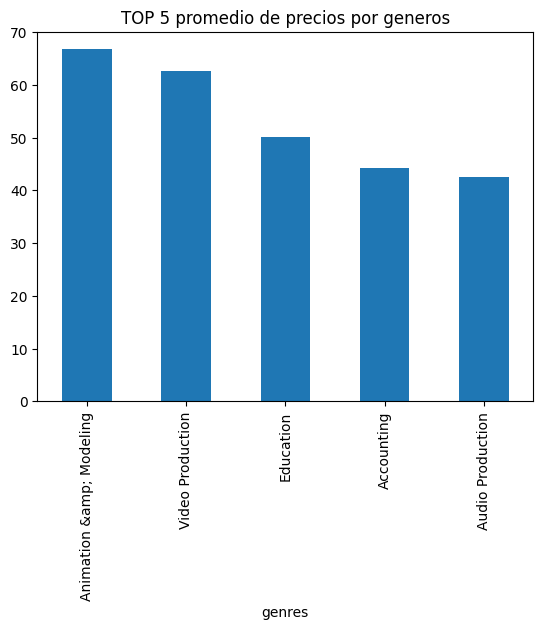

In [26]:
# TOP 5 promedio de precios por generos
game_EDA.groupby('genres')['price'].mean().sort_values(ascending=False).head(5).plot.bar()
plt.title('TOP 5 promedio de precios por generos')
plt.show()

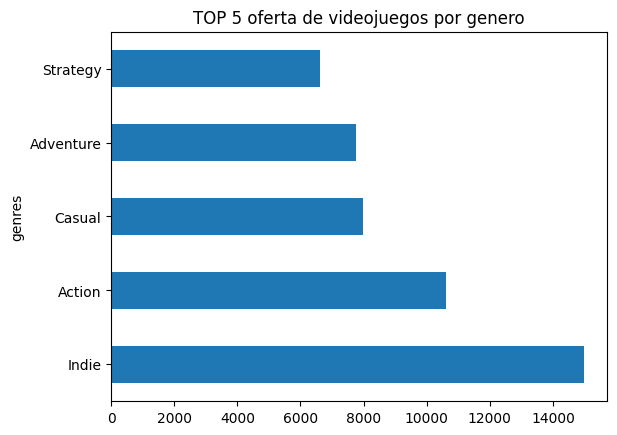

In [27]:
# TOP 5 oferta de videojuegos por genero
game_EDA.genres.value_counts().head(5).plot.barh()
plt.title('TOP 5 oferta de videojuegos por genero')
plt.show()

developer
Ubisoft - San Francisco    1258
SmiteWorks USA, LLC         812
Dovetail Games              253
Name: count, dtype: int64


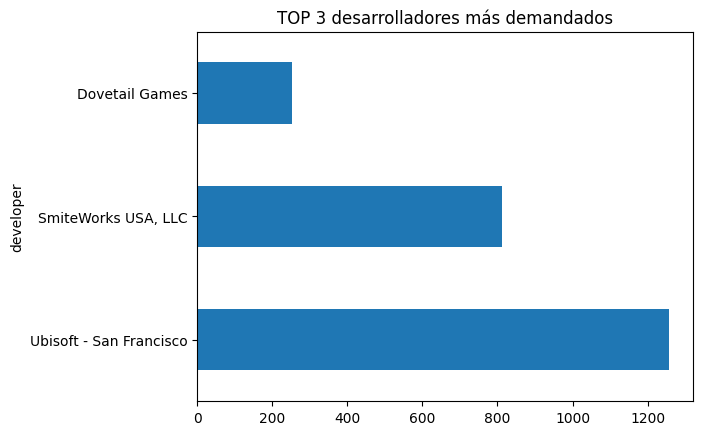

In [31]:
# TOP 3 desarrolladores más demandados
print(games.developer.value_counts().head(3))
games.developer.value_counts().head(3).plot.barh()
plt.title('TOP 3 desarrolladores más demandados')
plt.show()

## Reviews Dataset

In [7]:
# TOP 3 Juegos con mejor recomendación
# para ello vamos a concatenar el dataset de games con el de review

reviews_EDA = pd.merge(reviews,games,how='inner',left_on='item_id',right_on='id')

In [15]:
reviews_EDA.head(5)

,user_id,item_id,recommend,sentiment_analysis,publisher,genres,app_name,release_date,price,id,developer,average price,year
0,76561197970982479,1250,True,2,Tripwire Interactive,[Action],Killing Floor,2009-05-14,19.99,1250,Tripwire Interactive,9.161200,2009
1,76561197970982479,22200,True,2,ACE Team,"[Action, Indie]",Zeno Clash,2009-04-21,9.99,22200,ACE Team,6.267391,2009
2,js41637,227300,True,1,SCS Software,"[Indie, Simulation]",Euro Truck Simulator 2,2013-01-16,19.99,227300,SCS Software,8.703615,2013
3,js41637,239030,True,1,3909,"[Adventure, Indie]","Papers, Please",2013-08-08,9.99,239030,3909,7.490011,2013
4,evcentric,248820,True,2,Chucklefish,"[Action, Indie, RPG]",Risk of Rain,2013-11-08,9.99,248820,"Hopoo Games, LLC",8.910102,2013


In [9]:
# Convertir el formato de fechas a 'release_date'
reviews_EDA.release_date = pd.to_datetime(reviews_EDA.release_date, format='mixed')

In [14]:
# Convertir las fechas a los años
reviews_EDA["year"] = reviews_EDA.release_date.dt.year

In [17]:
reviews_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49080 entries, 0 to 49079
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             49080 non-null  object        
 1   item_id             49080 non-null  object        
 2   recommend           49080 non-null  bool          
 3   sentiment_analysis  49080 non-null  int64         
 4   publisher           49080 non-null  object        
 5   genres              49080 non-null  object        
 6   app_name            49080 non-null  object        
 7   release_date        49080 non-null  datetime64[ns]
 8   price               49080 non-null  float64       
 9   id                  49080 non-null  object        
 10  developer           49080 non-null  object        
 11  average price       49080 non-null  float64       
 12  year                49080 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int

<Axes: ylabel='app_name,recommend'>

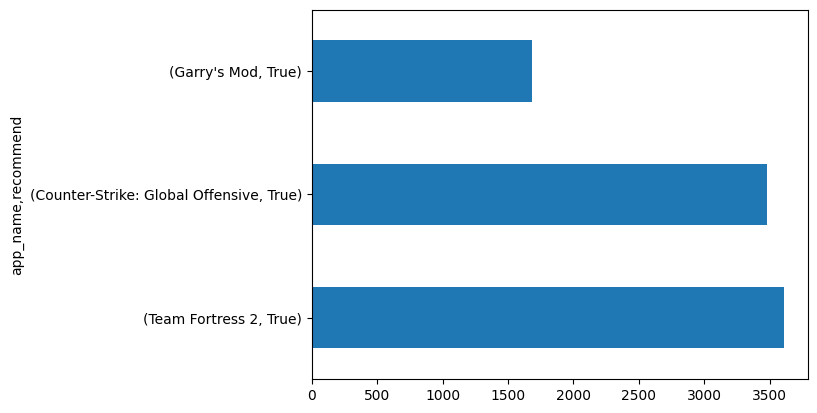

In [4]:
reviews_EDA.groupby('app_name')['recommend'].value_counts().sort_values(ascending=False).head(3).plot.barh()

<Axes: ylabel='app_name,sentiment_analysis'>

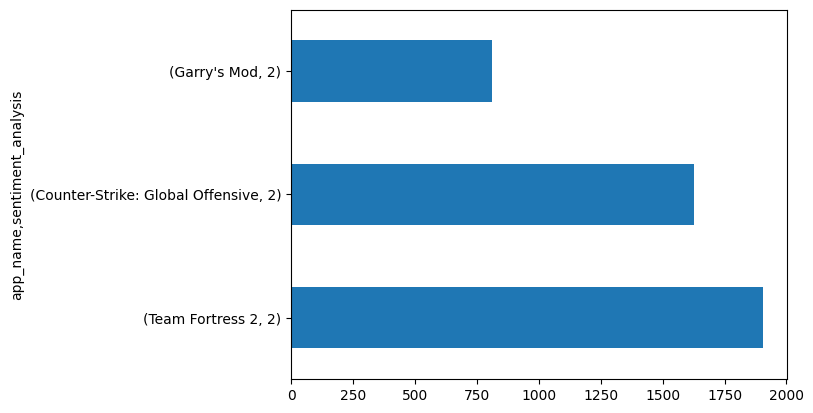

In [12]:
# TOP 3 juegos con mejor recomendación
reviews_EDA_positive.groupby('app_name')['sentiment_analysis'].value_counts().sort_values(ascending=False).head(3).plot.barh()

<Axes: ylabel='developer,sentiment_analysis'>

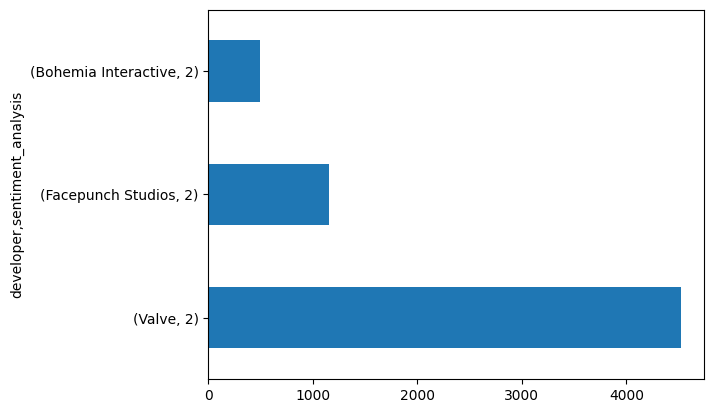

In [11]:
# TOP 3 desarrolladores con mejor recomendación
reviews_EDA_positive = reviews_EDA[reviews_EDA.sentiment_analysis >= 2]
reviews_EDA_positive.groupby('developer')['sentiment_analysis'].value_counts().sort_values(ascending=False).head(3).plot.barh()

In [19]:
top_3_by_year = reviews_EDA.groupby('year').apply(lambda x: x.nlargest(3, 'sentiment_analysis')).reset_index(drop=True)

C:\Users\JAY\AppData\Local\Temp\ipykernel_2776\505500051.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_by_year = reviews_EDA.groupby('year').apply(lambda x: x.nlargest(3, 'sentiment_analysis')).reset_index(drop=True)


In [20]:
top_3_by_year

,user_id,item_id,recommend,sentiment_analysis,publisher,genres,app_name,release_date,price,id,developer,average price,year
0,76561198055968875,327950,True,2,"Retroism, Nightdive Studios","[Adventure, Simulation]",Sword of the Samurai,1989-01-01,6.990000,327950,"MicroProse Software, Inc",9.290000,1989
1,alyboxie,32340,True,2,"LucasArts, Lucasfilm, Disney Interactive",[Adventure],LOOM™,1990-01-01,5.990000,32340,LucasArts,11.344648,1990
2,76561198091490622,9180,True,2,id Software,[Action],Commander Keen,1990-12-14,4.990000,9180,id Software,9.161200,1990
3,FDAOP,9180,True,2,id Software,[Action],Commander Keen,1990-12-14,4.990000,9180,id Software,9.161200,1990
4,SamuelTepes,358260,True,2,Apogee Software,[Action],Crystal Caves,1991-10-23,4.990000,358260,3D Realms (Apogee Software),9.161200,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,diego9031,322330,True,2,Klei Entertainment,"[Adventure, Indie, Simulation]",Don't Starve Together,2016-04-21,14.990000,322330,Klei Entertainment,8.558627,2016
79,StelerForYou,211820,True,2,Chucklefish,"[Action, Adventure, Casual, Indie, RPG]",Starbound,2016-07-22,14.990000,211820,Chucklefish,5.867551,2016
80,GoAwayZach,304930,True,2,Smartly Dressed Games,"[Action, Adventure, Casual, Free to Play, Indie]",Unturned,2017-07-07,4.990000,304930,Smartly Dressed Games,4.990000,2017
81,76561198070194565,427270,True,2,Robot Entertainment,"[Action, Free to Play, Strategy]",Orcs Must Die! Unchained,2017-04-19,24.535455,427270,Robot Entertainment,24.535455,2017


C:\Users\JAY\AppData\Local\Temp\ipykernel_2776\854862743.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_3_by_year = reviews_EDA.groupby('year').apply(lambda x: x.nlargest(3, 'sentiment_analysis')).reset_index(drop=True)


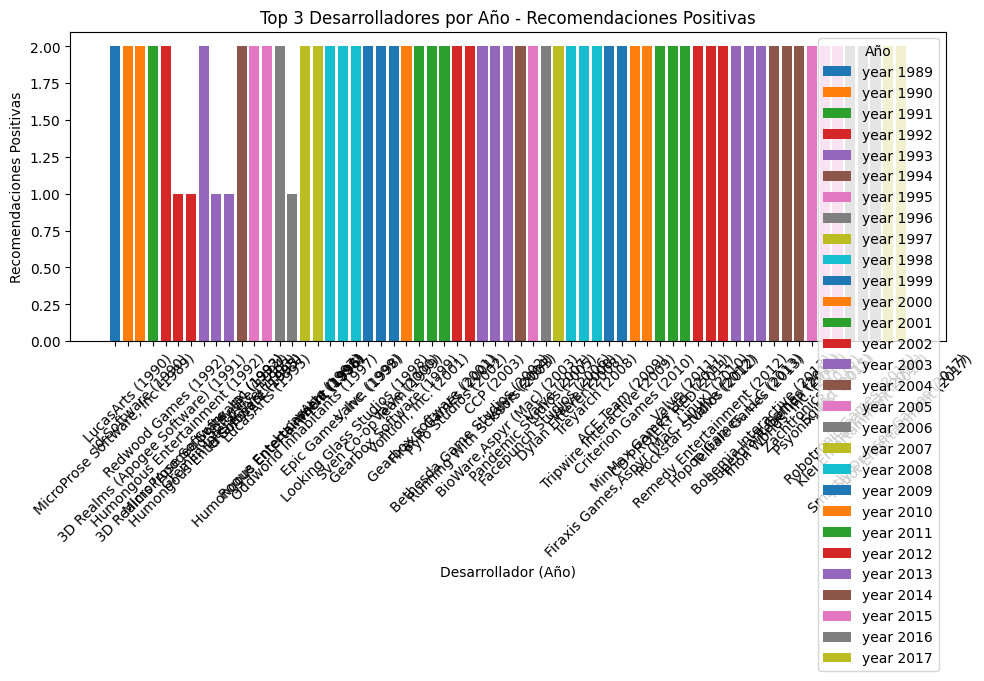

In [22]:
# Filtrar los top 3 desarrolladores por año
top_3_by_year = reviews_EDA.groupby('year').apply(lambda x: x.nlargest(3, 'sentiment_analysis')).reset_index(drop=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
for year in top_3_by_year['year'].unique():
    subset = top_3_by_year[top_3_by_year['year'] == year]
    plt.bar(subset['developer'] + " (" + subset['year'].astype(str) + ")", subset['sentiment_analysis'], label=f"year {year}")

plt.xlabel('Desarrollador (Año)')
plt.ylabel('Recomendaciones Positivas')
plt.title('Top 3 Desarrolladores por Año - Recomendaciones Positivas')
plt.xticks(rotation=45)
plt.legend(title="Año")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Items Dataset

In [6]:
items.head()

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,30,Day Of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0.0,0.0


<Axes: ylabel='item_name'>

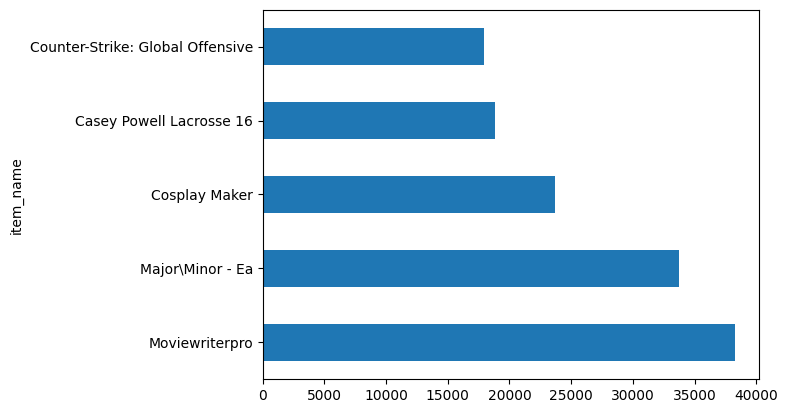

In [3]:
items.groupby('item_name')['playtime_forever'].mean().sort_values(ascending=False).head(5).plot.barh()